In [71]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import SVG, display

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt

In [72]:
data_grades = pd.read_csv("C:\\Users\\User\\Downloads\\grades (1).csv")
data_grades

,PUPIL_SEX,PUPIL_CLASS,TEACHER_RIGHT,TEACHER_CHK,TEACHER_QUEST,TEACHER_CORR,PUPIL_CORR,PUPIL_STRIP,GRADE
0,F,8A,65,0,4,2,1,6,4-
1,F,8A,70,4,0,4,0,4,3
2,F,8A,85,0,0,4,3,5,4
3,M,8A,55,0,0,1,8,3,3
4,M,8A,40,1,2,0,3,4,2
...,...,...,...,...,...,...,...,...,...
67,F,8A,80,1,0,2,1,7,4-
68,F,8A,85,0,0,1,2,2,4
69,F,8A,90,0,0,0,1,1,4
70,F,8A,95,0,0,3,1,2,5-


In [73]:
# кодируем строки, переводя их в числа, т.к. классификация не принимает строки
for i in data_grades.columns:
    data_grades[i] = LabelEncoder().fit_transform(data_grades[i])

In [74]:
X = data_grades[data_grades.columns[:-1]]
y = data_grades['GRADE']

# Grades

### Дерево решений на 100% данных

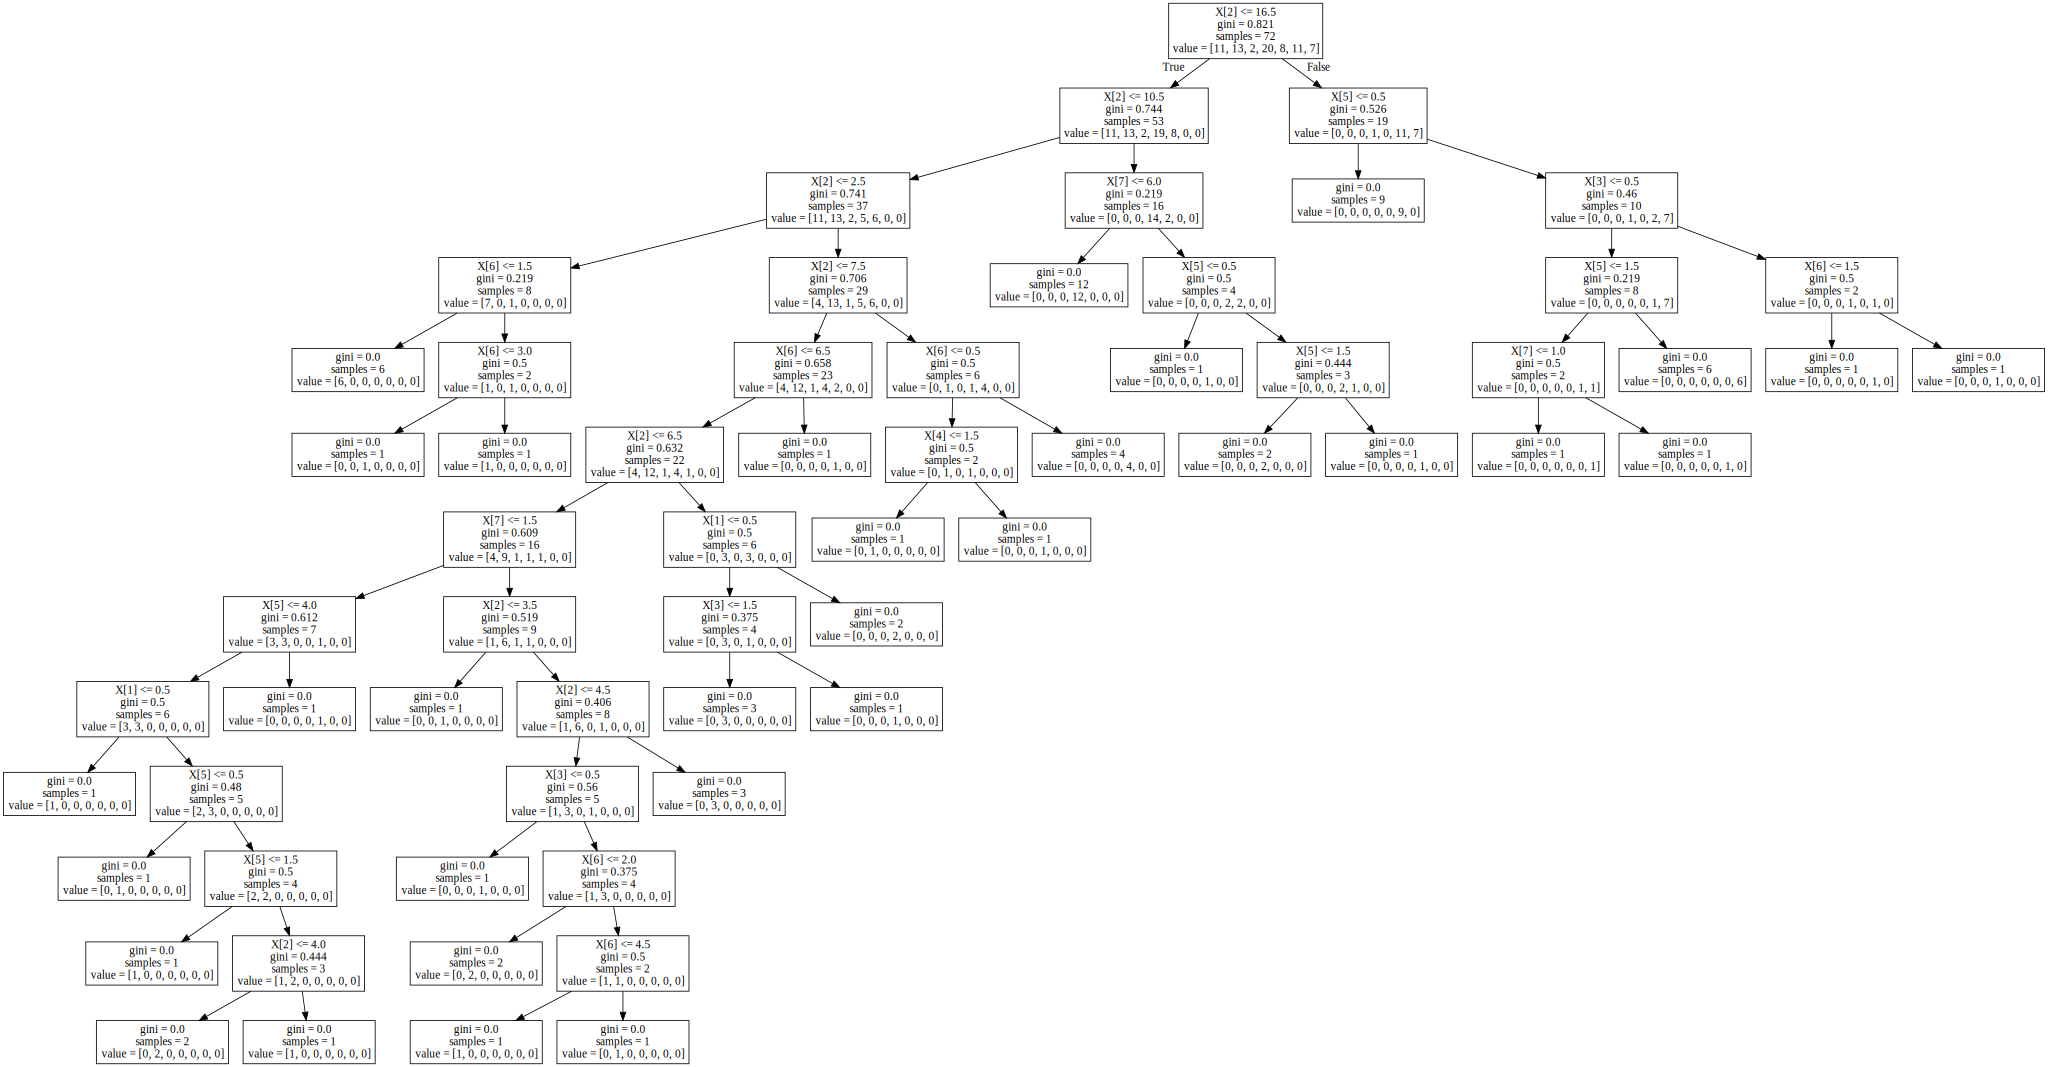

In [75]:
# создаем модель. random_state фиксируем для того, чтобы можно было получить те же значения в будущем, при повторном обучении
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X, y)

#отображение дерева решений
display(graphviz.Source(export_graphviz(tree, out_file=None)))

### Дерево решений information gain

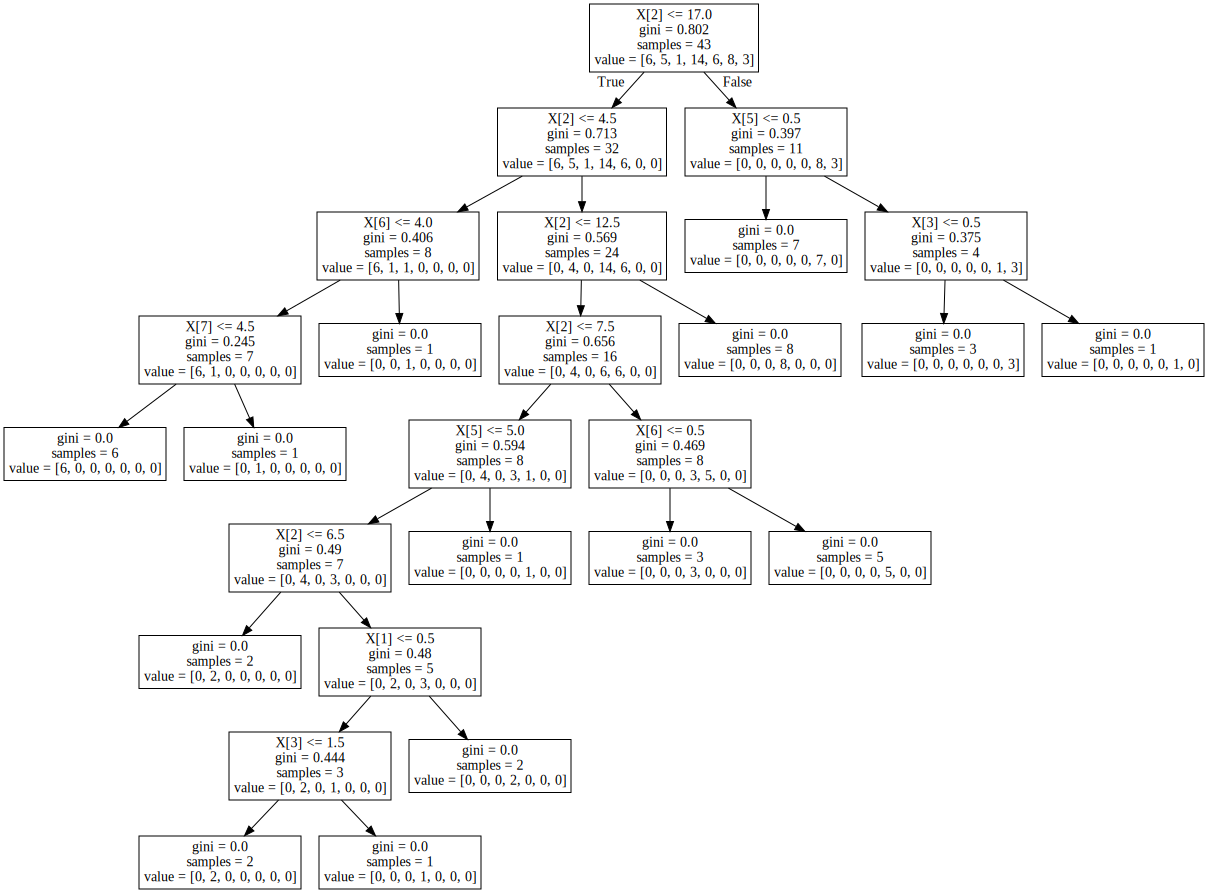

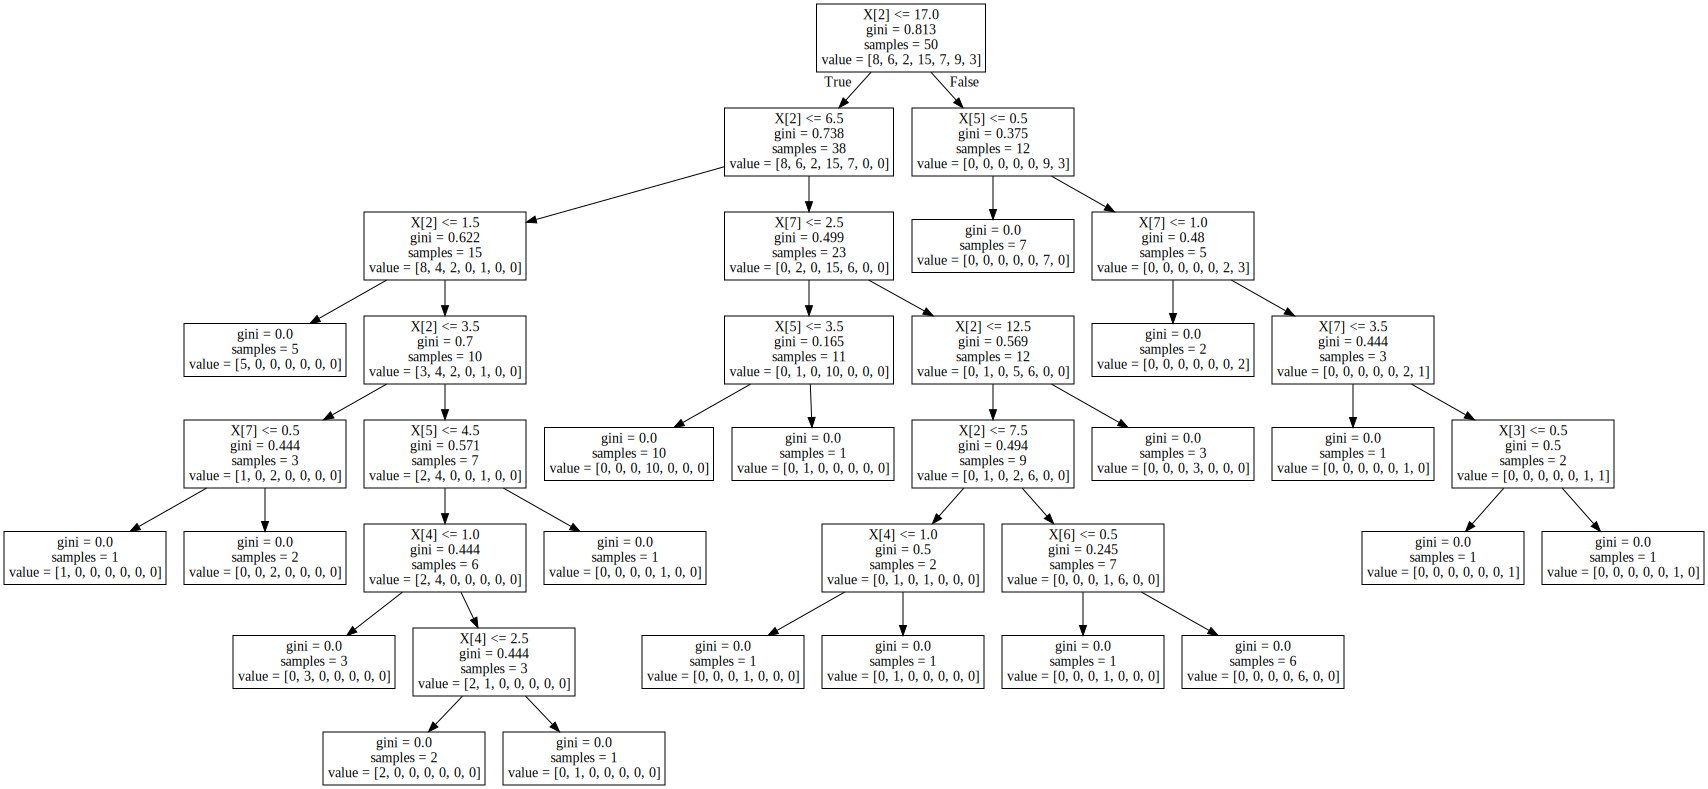

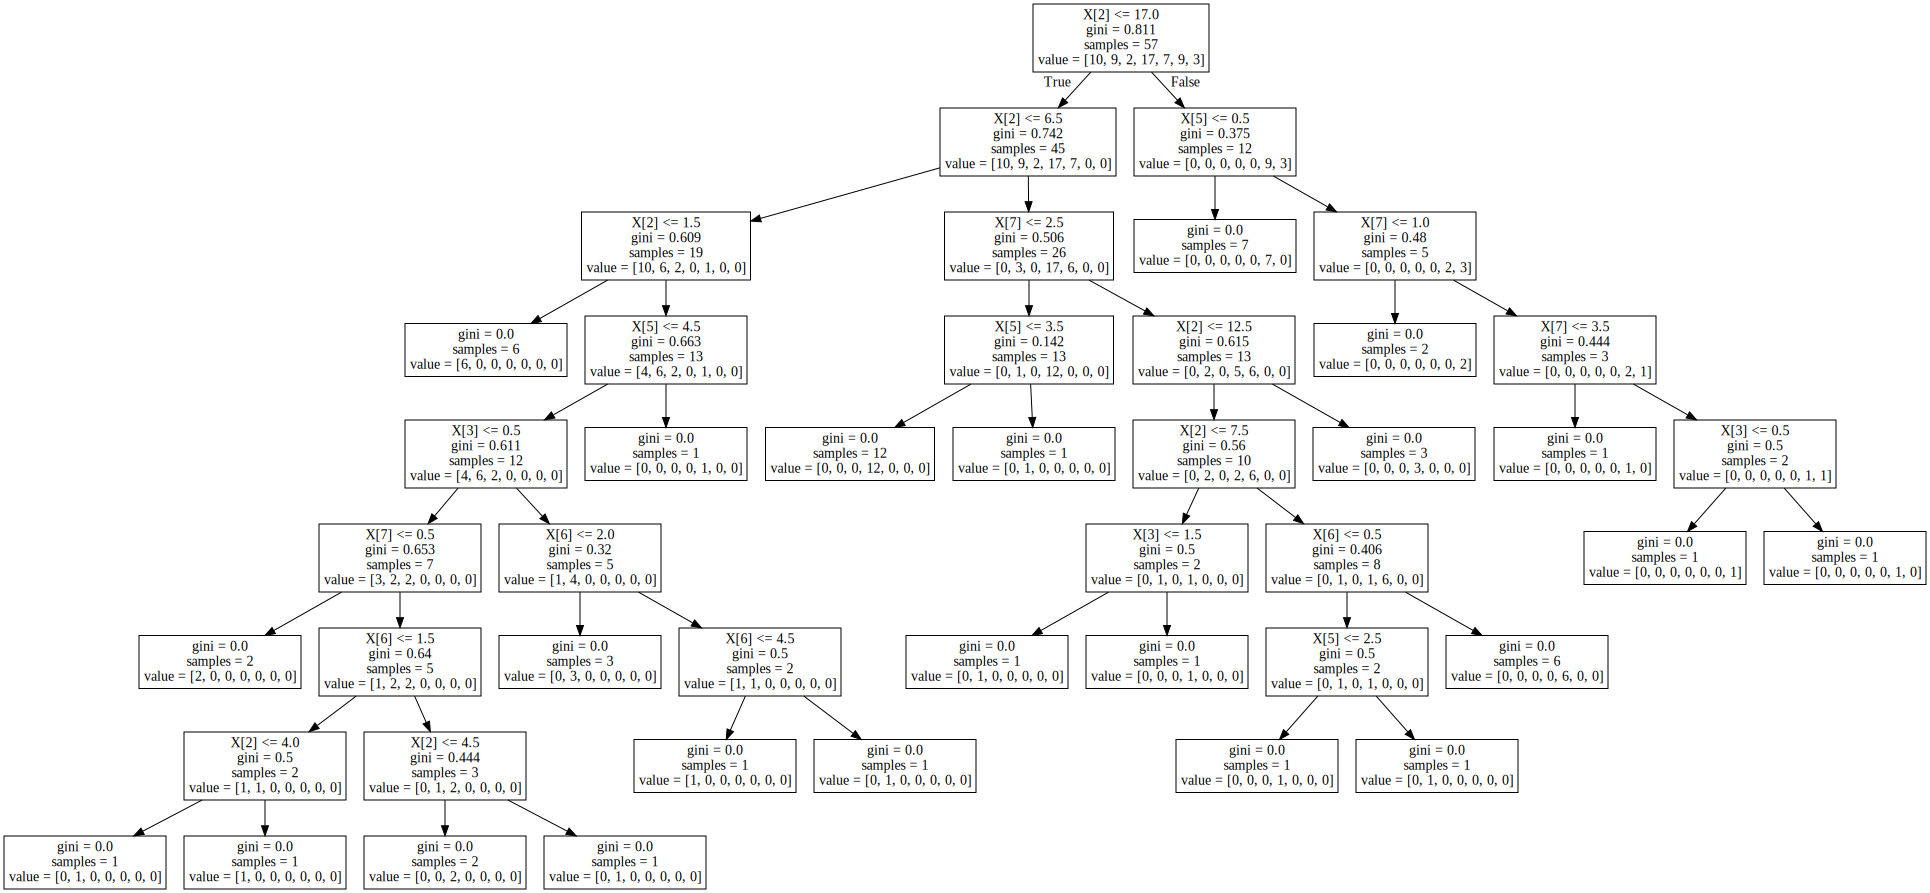

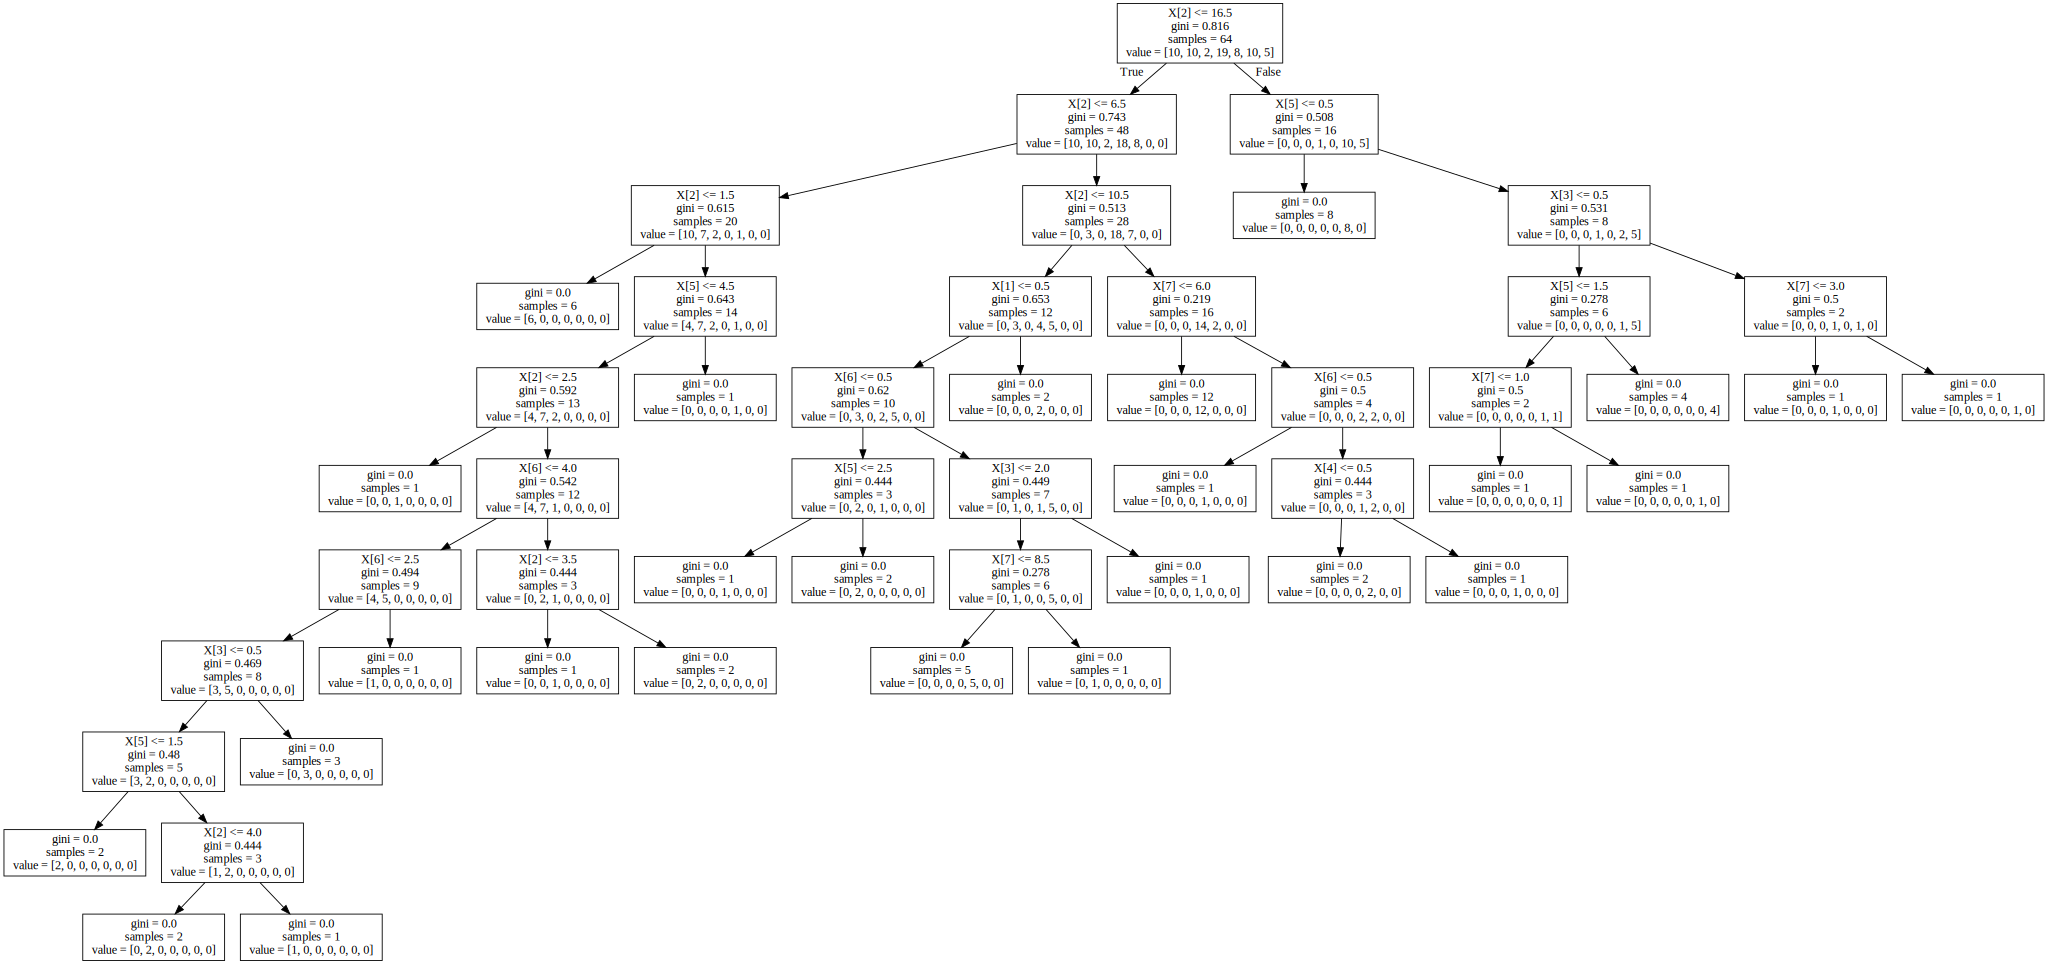

In [76]:
accuracy_tree = []
precision_tree = []
f1_tree = []
recall_tree = []
x = range(60, 91, 10)

for i in x:
    #разбиваем датасет на обучающую/тестовую выборку на 60/40, 70/30, 80/20, 90/10
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(100-i)/100, random_state=123)

    #создаем модель и обучаем ее
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)

    #фиксируем ожидаемые значения. Те, что реально есть в датасете
    expected = y_test
    #классифицируем тестовую выборку и получаем значения, которые дальше будем сравнивать с ожидаемыми
    predicted = tree.predict(X_test)
    
    #заполнение массивов оценок
    accuracy_tree.append(accuracy_score(expected, predicted))
    precision_tree.append(precision_score(expected, predicted, zero_division = 1, average='macro'))
    f1_tree.append(f1_score(expected, predicted, zero_division = 1, average='macro'))
    recall_tree.append(recall_score(expected, predicted, zero_division = 1, average='macro'))
    
    display(graphviz.Source(export_graphviz(tree, out_file=None)))

Text(0.5, 0, 'Обучающий набор, %')

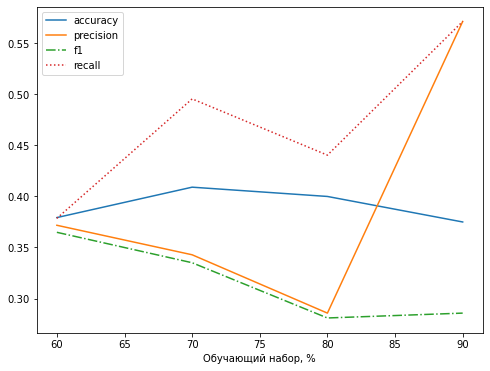

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))

#отображение графиков
ax.plot(x, accuracy_tree, label = 'accuracy')
ax.plot(x, precision_tree, label = 'precision', linestyle='-')
ax.plot(x, f1_tree, label = 'f1', linestyle='-.')
ax.plot(x, recall_tree, label = 'recall', linestyle=':')
ax.legend()
ax.set_xlabel('Обучающий набор, %')


### Дерево решений index gini

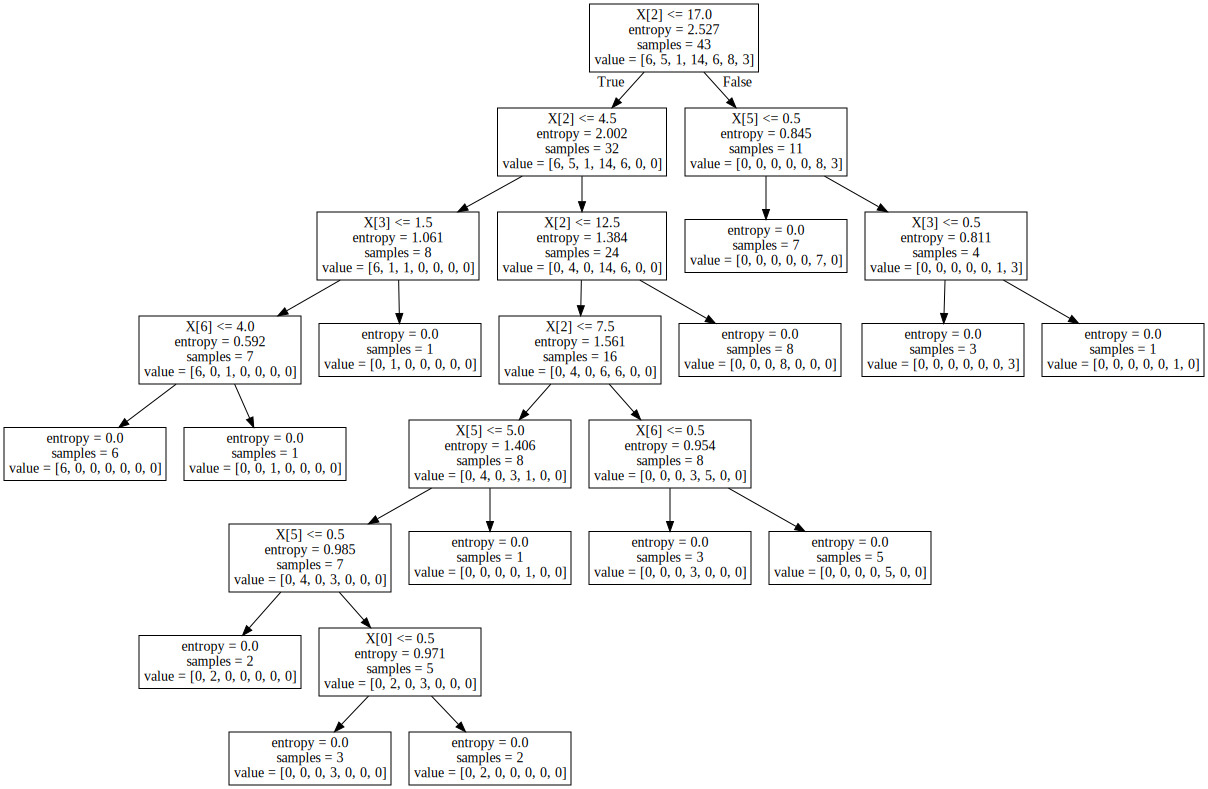

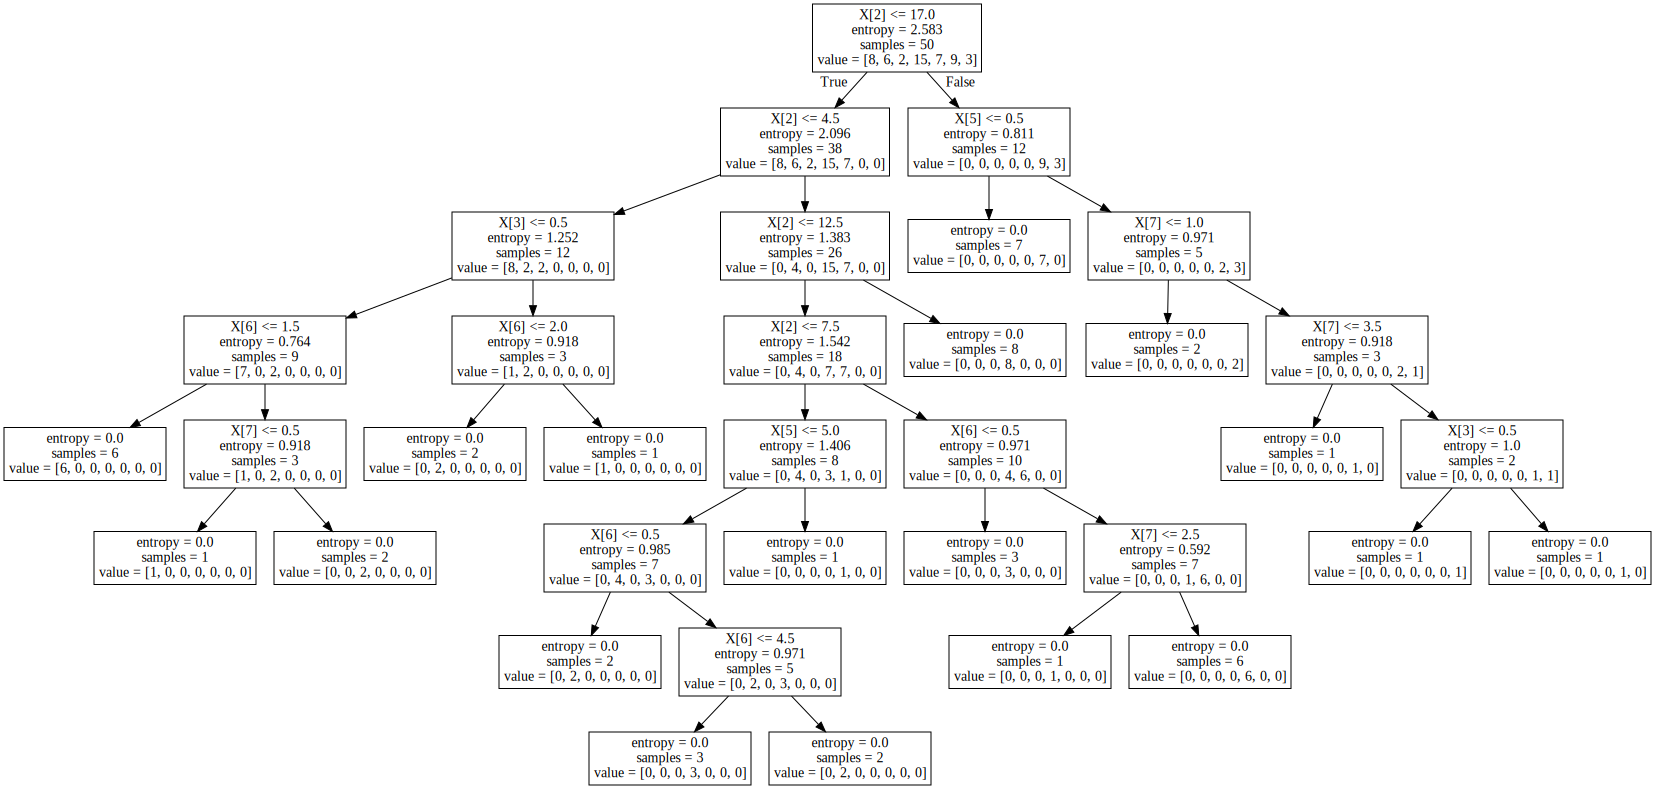

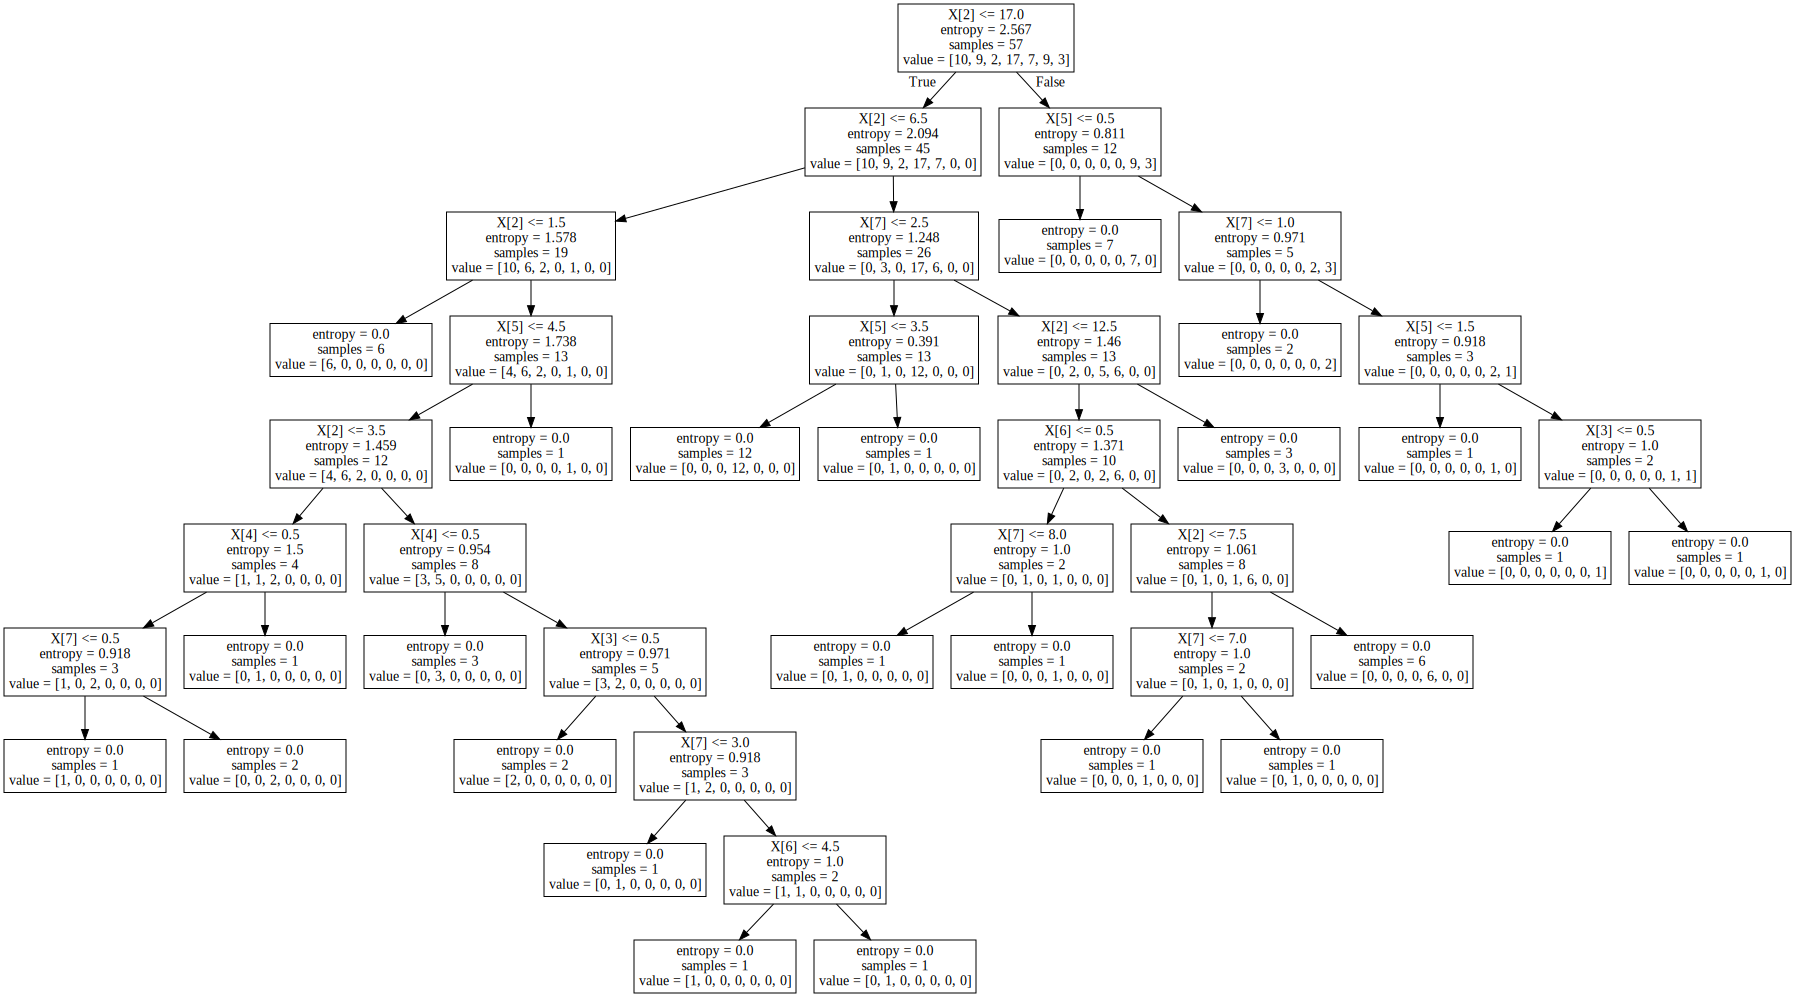

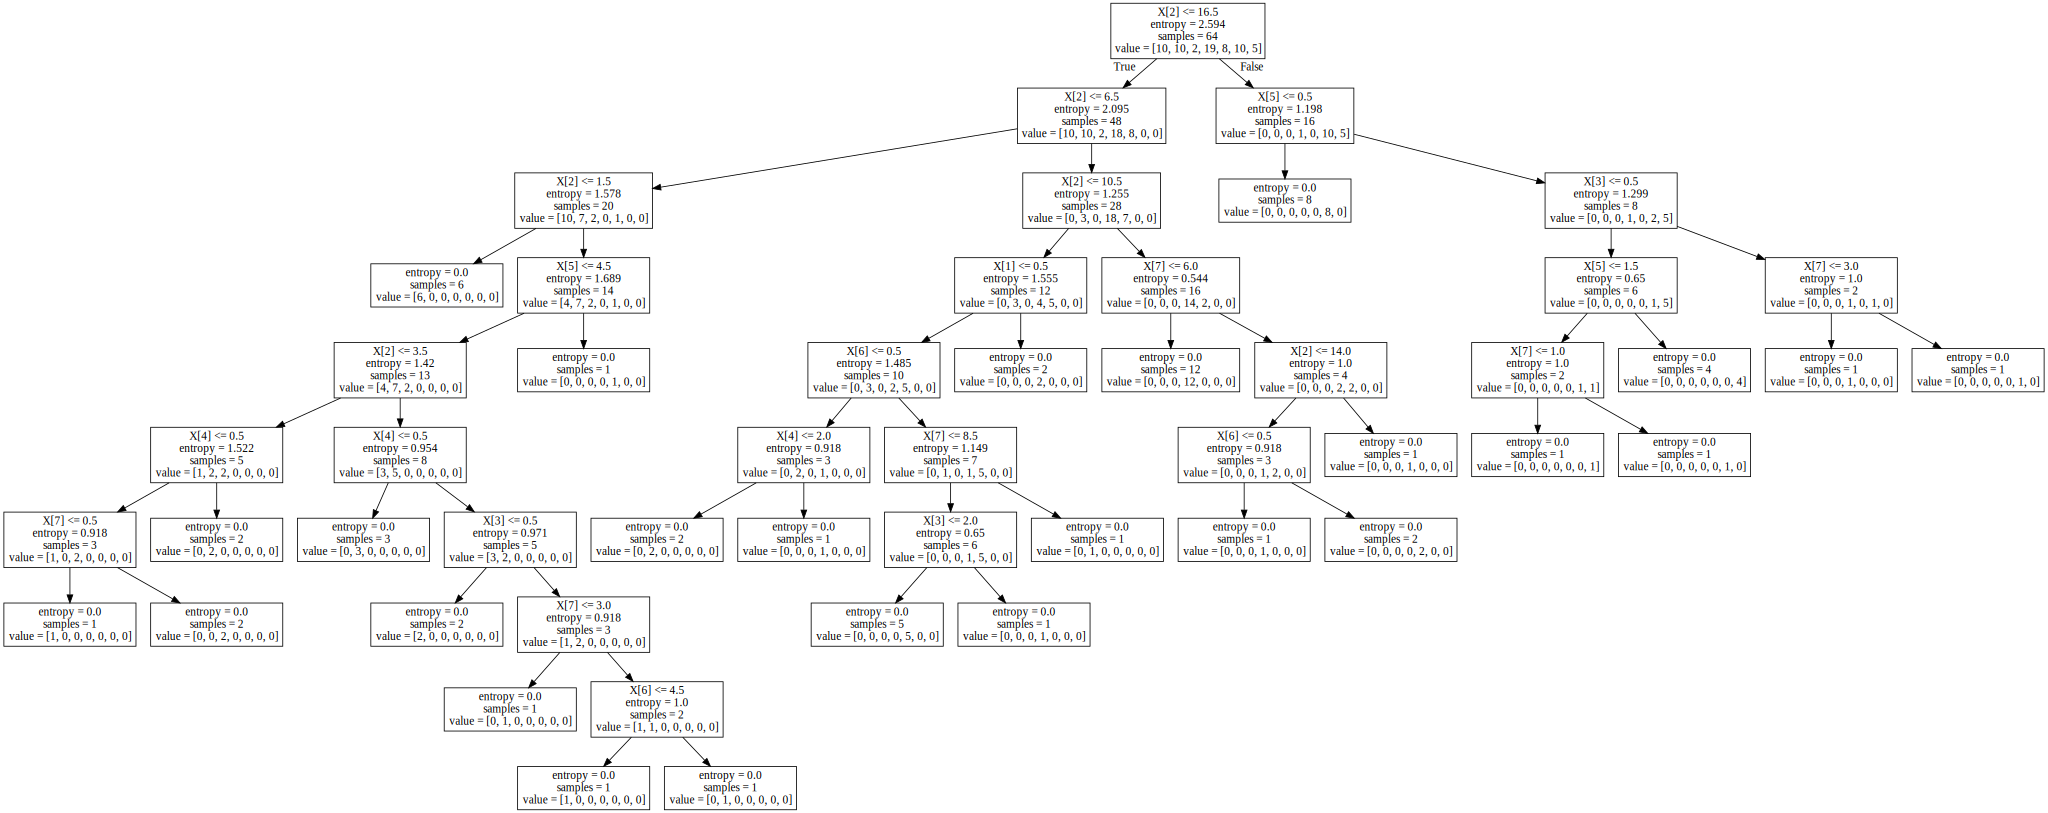

In [78]:
accuracy_tree = []
precision_tree = []
f1_tree = []
recall_tree = []
x = range(60, 91, 10)

for i in x:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(100-i)/100, random_state=123)

    tree = DecisionTreeClassifier(random_state=1,criterion="entropy")
    tree.fit(X_train, y_train)

    expected = y_test
    predicted = tree.predict(X_test)
    
    accuracy_tree.append(accuracy_score(expected, predicted))
    precision_tree.append(precision_score(expected, predicted, zero_division = 1, average='macro'))
    f1_tree.append(f1_score(expected, predicted, zero_division = 1, average='macro'))
    recall_tree.append(recall_score(expected, predicted, zero_division = 1, average='macro'))
    display(graphviz.Source(export_graphviz(tree, out_file=None)))

Text(0.5, 0, 'Обучающий набор, %')

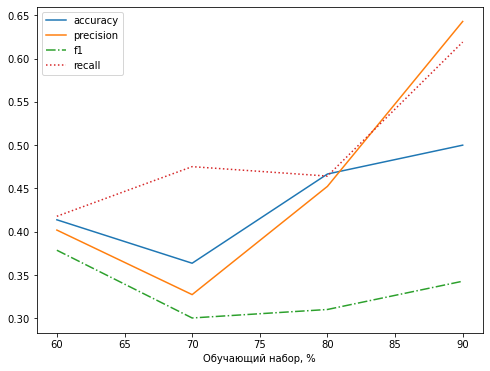

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, accuracy_tree, label = 'accuracy')
ax.plot(x, precision_tree, label = 'precision', linestyle='-')
ax.plot(x, f1_tree, label = 'f1', linestyle='-.')
ax.plot(x, recall_tree, label = 'recall', linestyle=':')
ax.legend()
ax.set_xlabel('Обучающий набор, %')


#  Census Income 

In [80]:
data_adult = pd.read_csv("C:\\Users\\User\\Downloads\\adult.data.csv")
test_adult = pd.read_csv("C:\\Users\\User\\Downloads\\adult.test.csv")

In [81]:
for i in data_adult.columns:
    data_adult[i] = LabelEncoder().fit_transform(data_adult[i])
    
for i in test_adult.columns:
    test_adult[i] = LabelEncoder().fit_transform(test_adult[i])

In [82]:
X_train = data_adult[data_adult.columns[:-1]]
y_train = data_adult[data_adult.columns[-1]]

In [83]:
X_test = test_adult[test_adult.columns[:-1]]
y_test = test_adult[test_adult.columns[-1]]

### Дерево решений

In [84]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

expected = y_test
predicted = tree.predict(X_test)

accuracy_tree_adult = accuracy_score(expected, predicted)
precision_tree_adult = precision_score(expected, predicted, zero_division = 1)
f1_tree_adult = f1_score(expected, predicted, zero_division = 1)
recall_tree_adult = recall_score(expected, predicted, zero_division = 1)

#display(graphviz.Source(export_graphviz(tree, out_file=None)))

In [85]:
print('accuracy = '+str(accuracy_tree_adult))
print('precision = '+str(precision_tree_adult))
print('f1 = '+str(f1_tree_adult))
print('recall = '+str(recall_tree_adult))

accuracy = 0.802027027027027
precision = 0.5809721861190538
f1 = 0.5810477057064863
recall = 0.5811232449297972


### Бэггинг

In [86]:
accuracy_bagging = []
precision_bagging = []
f1_bagging = []
recall_bagging = []
x = range(50, 101, 10)

for i in x:
    bag = BaggingClassifier(n_estimators=i, random_state=0)
    bag.fit(X_train, y_train)

    expected = y_test
    predicted = bag.predict(X_test)
    
    accuracy_bagging.append(accuracy_score(expected, predicted))
    precision_bagging.append(precision_score(expected, predicted))
    f1_bagging.append(f1_score(expected, predicted))
    recall_bagging.append(recall_score(expected, predicted))

Text(0.5, 0, 'Количество участников ансамбля, шт.')

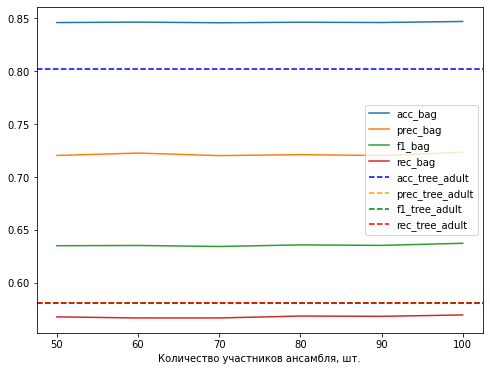

In [87]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, accuracy_bagging, label = 'acc_bag')
ax.plot(x, precision_bagging, label = 'prec_bag')
ax.plot(x, f1_bagging, label = 'f1_bag')
ax.plot(x, recall_bagging, label = 'rec_bag')

ax.axhline(y=accuracy_tree_adult, label = 'acc_tree_adult', color = 'blue', linestyle='--')
ax.axhline(y=precision_tree_adult, label = 'prec_tree_adult', color = 'orange', linestyle='--')
ax.axhline(y=f1_tree_adult, label = 'f1_tree_adult', color = 'green', linestyle='--')
ax.axhline(y=recall_tree_adult, label = 'rec_tree_adult', color = 'red', linestyle='--')
ax.legend()
ax.set_xlabel('Количество участников ансамбля, шт.')


### Случайный лес

In [88]:
accuracy_forest = []
precision_forest = []
f1_forest = []
recall_forest = []
x = range(50, 101, 10)

for i in x:
    forest = RandomForestClassifier(n_estimators=i, random_state=0)
    forest.fit(X_train, y_train)

    expected = y_test
    predicted = forest.predict(X_test)
    
    accuracy_forest.append(accuracy_score(expected, predicted))
    precision_forest.append(precision_score(expected, predicted))
    f1_forest.append(f1_score(expected, predicted))
    recall_forest.append(recall_score(expected, predicted))

Text(0.5, 0, 'Количество деревьев, шт.')

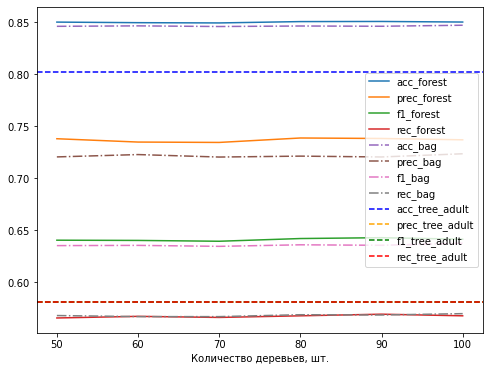

In [89]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, accuracy_forest, label = 'acc_forest')
ax.plot(x, precision_forest, label = 'prec_forest')
ax.plot(x, f1_forest, label = 'f1_forest')
ax.plot(x, recall_forest, label = 'rec_forest')

ax.plot(x, accuracy_bagging, label = 'acc_bag', linestyle ='-.')
ax.plot(x, precision_bagging, label = 'prec_bag', linestyle ='-.')
ax.plot(x, f1_bagging, label = 'f1_bag', linestyle ='-.')
ax.plot(x, recall_bagging, label = 'rec_bag', linestyle ='-.')

ax.axhline(y=accuracy_tree_adult, label = 'acc_tree_adult', color = 'blue', linestyle='--')
ax.axhline(y=precision_tree_adult, label = 'prec_tree_adult', color = 'orange', linestyle='--')
ax.axhline(y=f1_tree_adult, label = 'f1_tree_adult', color = 'green', linestyle='--')
ax.axhline(y=recall_tree_adult, label = 'rec_tree_adult', color = 'red', linestyle='--')
ax.legend()
ax.set_xlabel('Количество деревьев, шт.')


### Градиентный бустинг

In [90]:
accuracy_grad = []
precision_grad = []
f1_grad = []
recall_grad = []
x = range(50, 101, 10)

for i in x:

    gbrt = GradientBoostingClassifier(random_state=0, max_depth=2, n_estimators = i)
    gbrt.fit(X_train, y_train)

    expected = y_test
    predicted = gbrt.predict(X_test)
    
    accuracy_grad.append(accuracy_score(expected, predicted))
    precision_grad.append(precision_score(expected, predicted))
    f1_grad.append(f1_score(expected, predicted))
    recall_grad.append(recall_score(expected, predicted))

Text(0.5, 0, 'Количество участников ансамбля, шт.')

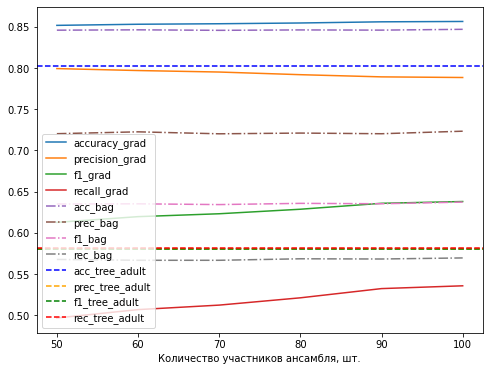

In [91]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, accuracy_grad, label = 'accuracy_grad')
ax.plot(x, precision_grad, label = 'precision_grad')
ax.plot(x, f1_grad, label = 'f1_grad')
ax.plot(x, recall_grad, label = 'recall_grad')

ax.plot(x, accuracy_bagging, label = 'acc_bag', linestyle ='-.')
ax.plot(x, precision_bagging, label = 'prec_bag', linestyle ='-.')
ax.plot(x, f1_bagging, label = 'f1_bag', linestyle ='-.')
ax.plot(x, recall_bagging, label = 'rec_bag', linestyle ='-.')

ax.axhline(y=accuracy_tree_adult, label = 'acc_tree_adult', color = 'blue', linestyle='--')
ax.axhline(y=precision_tree_adult, label = 'prec_tree_adult', color = 'orange', linestyle='--')
ax.axhline(y=f1_tree_adult, label = 'f1_tree_adult', color = 'green', linestyle='--')
ax.axhline(y=recall_tree_adult, label = 'rec_tree_adult', color = 'red', linestyle='--')
ax.legend()
ax.set_xlabel('Количество участников ансамбля, шт.')
